## Module과 Data 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

In [2]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')
submission = pd.read_csv('./data/sample_submission.csv')

## Train Data와 Test Data 확인

In [3]:
print(test_df.shape)
test_df.head()

(2924, 9)


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [4]:
print(train_df.shape)
train_df.head()

(1253, 10)


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 결측치 유무 확인

In [5]:
def check_null(df):    
    total_cnt = 0
    for i in df.columns:
        cnt = sum(df[i].isnull())
        total_cnt += cnt
        if cnt:
            print(f'{i}열에 결측치{cnt}개')
        else:
            print(f'{i}열에 결측치 없음')
    if total_cnt == 0:
        print('모든 열에 결측치 없음')
    else:
        print(f'총 결측치 {total_cnt}개')

In [6]:
check_null(test_df)

id열에 결측치 없음
Gender열에 결측치 없음
Lenght열에 결측치 없음
Diameter열에 결측치 없음
Height열에 결측치 없음
Whole Weight열에 결측치 없음
Shucked Weight열에 결측치 없음
Viscra Weight열에 결측치 없음
Shell Weight열에 결측치 없음
모든 열에 결측치 없음


In [7]:
check_null(train_df)

id열에 결측치 없음
Gender열에 결측치 없음
Lenght열에 결측치 없음
Diameter열에 결측치 없음
Height열에 결측치 없음
Whole Weight열에 결측치 없음
Shucked Weight열에 결측치 없음
Viscra Weight열에 결측치 없음
Shell Weight열에 결측치 없음
Target열에 결측치 없음
모든 열에 결측치 없음


## 'id' 제거

In [8]:
train_df = train_df.drop(columns='id')
test_df = test_df.drop(columns='id')
train_df.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 'Target' 분석

In [9]:
train_df.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

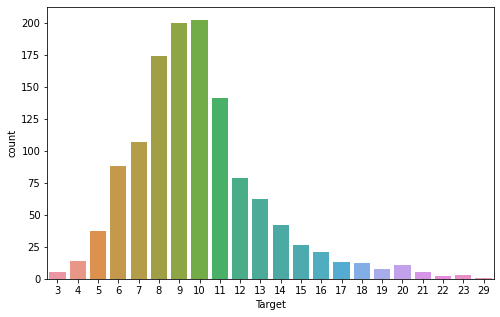

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(train_df['Target'])
plt.show()

## 'Gender' 분석

In [11]:
train_df.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

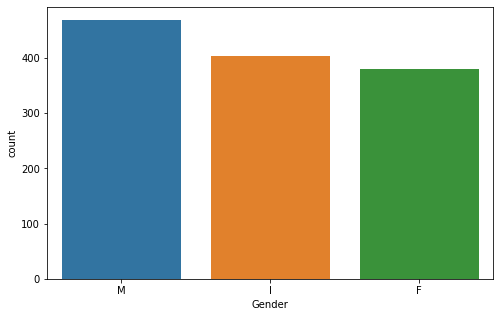

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(train_df['Gender'])
plt.show()

## Features 상관관계 분석

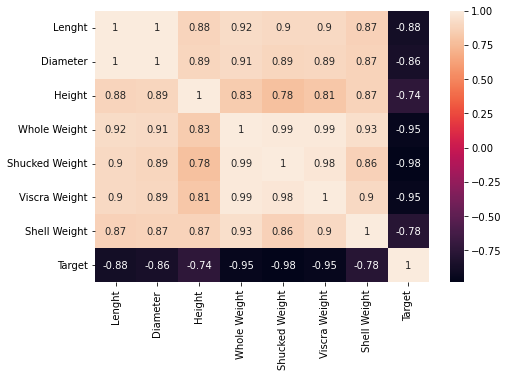

In [13]:
corr_df = train_df.corr()
plt.figure(figsize=(7.5,5))
sns.heatmap(data=corr_df.corr(), annot=True)
plt.show()

## Label Encoding 후 RandomForest 모델

In [14]:
def label_encode(df):
    for i in df.columns:
        if df[i].dtypes == "object":
            label_map = {}
            for j,k in enumerate(df[i].unique()):
                label_map[k] = j+1
            df[i] = df[i].replace(to_replace=label_map)

In [15]:
train_df_label = train_df.copy()
label_encode(train_df_label)
test_df_label = test_df.copy()
label_encode(test_df_label)

train_df_label.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [16]:
train_label_x = train_df_label.drop(columns='Target')
train_label_y = train_df_label['Target']
train_label_x.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045
2,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100
3,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370
4,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400


In [17]:
model_label = RandomForestRegressor()
model_label.fit(train_label_x,train_label_y)

pred_label = model_label.predict(test_df_label)
pred_label

array([ 9.14, 12.62,  5.14, ...,  9.65, 11.04, 11.02])

In [18]:
submission['Target'] = pred_label # 제출 파일 저장
submission.to_csv('submit_label.csv', index=False)
print('Label인코딩 후 NMAE:0.1621244457')

Label인코딩 후 NMAE:0.1621244457


## Onehot Encoding 후 RandomForest 모델

In [19]:
train_df_onehot = pd.get_dummies(train_df, columns = ['Gender'])
test_df_onehot = pd.get_dummies(test_df, columns = ['Gender'])
train_df_onehot.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0


In [20]:
train_onehot_x = train_df_onehot.drop(columns='Target')
train_onehot_y = train_df_onehot['Target']
train_onehot_x.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0,1,0


In [21]:
model_onehot = RandomForestRegressor()
model_onehot.fit(train_onehot_x,train_onehot_y)

pred_onehot = model_onehot.predict(test_df_onehot)
pred_onehot

array([ 8.3 , 12.88,  5.33, ...,  9.54,  9.86, 10.71])

In [22]:
submission['Target'] = pred_label # 제출 파일 저장
submission.to_csv('submit_label.csv', index=False)
print('Onehot인코딩 후 NMAE:0.1552376663')

Onehot인코딩 후 NMAE:0.1552376663


## Train 데이터로 NMAE 분석하기

In [23]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [24]:
# Label Data
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(train_label_x, train_label_y, test_size=0.2, random_state=123)

new_model_label = RandomForestRegressor()
new_model_label.fit(new_x_train,new_y_train)

pred_label = new_model_label.predict(new_x_test)

print(NMAE(new_y_test,pred_label))
print('pred값 반올림:',NMAE(new_y_test,np.rint(pred_label)))

0.1669898580121704
pred값 반올림: 0.16551724137931037


In [25]:
# Onehot Data
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(train_onehot_x, train_onehot_y, test_size=0.2, random_state=123)

new_model_onehot = RandomForestRegressor()
new_model_onehot.fit(new_x_train,new_y_train)

pred_onehot = new_model_onehot.predict(new_x_test)

print(NMAE(new_y_test,pred_onehot))
print('pred값 반올림:',NMAE(new_y_test,np.rint(pred_onehot)))

0.16257200811359038
pred값 반올림: 0.15821501014198783
